In [1]:
from sklearn.linear_model import LinearRegression


In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn import datasets

In [4]:
iris = datasets.load_iris()

In [5]:
x = iris.data
y = iris.target

In [6]:
data = pd.DataFrame(data= np.c_[x, y],
                     columns= iris['feature_names'] + ['target'])

In [7]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [8]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
data.shape

(150, 5)

In [10]:
data.dtypes


sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target               float64
dtype: object

In [11]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [12]:
data.duplicated().sum()

1

In [13]:
data[data.duplicated()==True]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
142,5.8,2.7,5.1,1.9,2.0


In [14]:
import seaborn as sns

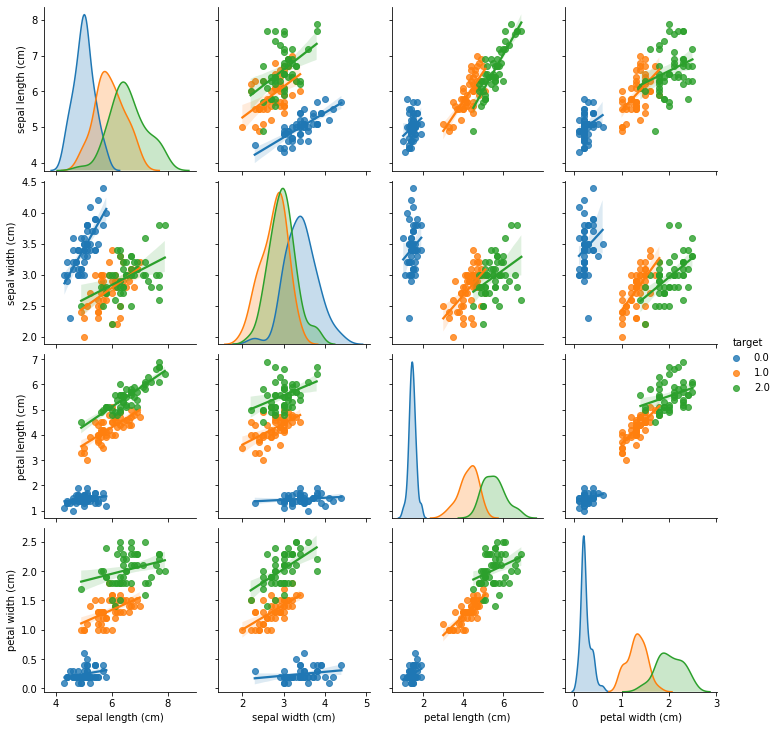

In [15]:
sns.pairplot(data, hue='target', kind="reg")

In [16]:
df0 = data[data.target==0]
df0.shape

(50, 5)

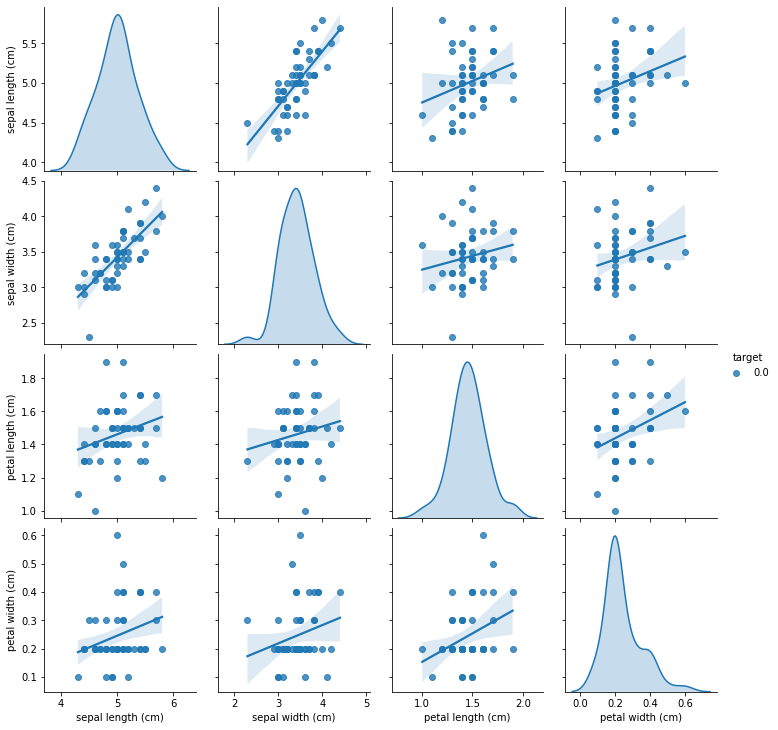

In [17]:
sns.pairplot(df0, hue='target' , kind="reg")


In [18]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

In [19]:
df0.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [20]:
df0.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

In [21]:
df0.columns[0:0]

Index([], dtype='object')

In [22]:
x = df0["sepal_width"]
y = df0["petal_width"]


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [24]:
len(x_train)
len(x_test)


13

In [26]:
model = LinearRegression()

In [27]:
model.fit(x_train.to_frame(), y_train.to_frame())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
y_pred = model.predict(x_test.to_frame())

In [29]:
import matplotlib.pyplot as plt

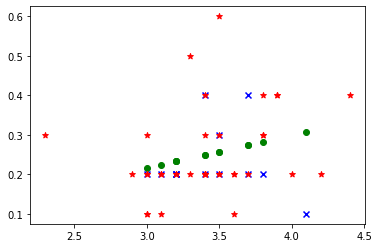

In [33]:
plt.scatter(x_test.to_frame(), y_pred, c='g', marker='o', label='1')
plt.scatter(x_test.to_frame(),y_test, c='b', marker='x', label='2')
plt.scatter(x_train,y_train, c='r', marker='*', label='2')
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score
msq = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("msq ", msq, ", r2 ", r2)


msq  0.008105044151504183 , r2  -0.201537247021234
